## 04. Generalizace rozhodovacího stromu (Decision Tree)

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
X, y = make_classification(n_samples=10000, n_features=20,
                           n_informative=5, n_redundant=15, random_state=1)

In [3]:
X.shape

(10000, 20)

In [4]:
# Třídy
np.unique(y)

array([0, 1])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train.shape

(8000, 20)

In [11]:
X_test.shape

(2000, 20)

In [12]:
# LR model
model = LogisticRegression()

In [13]:
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
# Evaluace 
y_train_pred = model.predict(X_train)
ACC_train = accuracy_score(y_train, y_train_pred) 
print(f'Trenovaci presnost: {ACC_train *100} %')
y_test_pred = model.predict(X_test)
ACC_test = accuracy_score(y_test, y_test_pred) 
print(f'Testovaci presnost: {ACC_test *100} %')


Trenovaci presnost: 86.2 %
Testovaci presnost: 85.65 %


In [21]:
# Nelinearni model 
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
# Evaluace 
y_train_pred = model.predict(X_train)
ACC_train = accuracy_score(y_train, y_train_pred) 
print(f'Trenovaci presnost: {ACC_train *100} %')
y_test_pred = model.predict(X_test)
ACC_test = accuracy_score(y_test, y_test_pred) 
print(f'Testovaci presnost: {ACC_test *100} %')

Trenovaci presnost: 100.0 %
Testovaci presnost: 91.45 %


In [38]:
# oveřte DT model v cyklu pro hloubku stromu od 1 do 20 
# uložte trénovací a testovací přesnost pro každou hloubku 
train_accuracy = []
test_accuracy = []

for i in range(1, 21, 1): 
    # model 
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    # evaluace 
    y_train_pred = model.predict(X_train)
    ACC_train = accuracy_score(y_train, y_train_pred) 
    train_accuracy.append(ACC_train)
    y_test_pred = model.predict(X_test)
    ACC_test = accuracy_score(y_test, y_test_pred) 
    test_accuracy.append(ACC_test) 
    print(f'hloubka: {i} | generaliyacni mezera: {(ACC_train * 100) - (ACC_test * 100)}')

hloubka: 1 | generaliyacni mezera: 1.2125000000000057
hloubka: 2 | generaliyacni mezera: 0.22500000000000853
hloubka: 3 | generaliyacni mezera: 1.4874999999999972
hloubka: 4 | generaliyacni mezera: 1.7375000000000114
hloubka: 5 | generaliyacni mezera: 1.8500000000000085
hloubka: 6 | generaliyacni mezera: 1.8125
hloubka: 7 | generaliyacni mezera: 2.8125
hloubka: 8 | generaliyacni mezera: 3.237499999999997
hloubka: 9 | generaliyacni mezera: 3.2624999999999886
hloubka: 10 | generaliyacni mezera: 4.037499999999994
hloubka: 11 | generaliyacni mezera: 4.962500000000006
hloubka: 12 | generaliyacni mezera: 6.087500000000006
hloubka: 13 | generaliyacni mezera: 6.0874999999999915
hloubka: 14 | generaliyacni mezera: 7.262499999999989
hloubka: 15 | generaliyacni mezera: 7.174999999999997
hloubka: 16 | generaliyacni mezera: 7.674999999999997
hloubka: 17 | generaliyacni mezera: 8.412499999999994
hloubka: 18 | generaliyacni mezera: 8.487499999999997
hloubka: 19 | generaliyacni mezera: 8.6875000000000

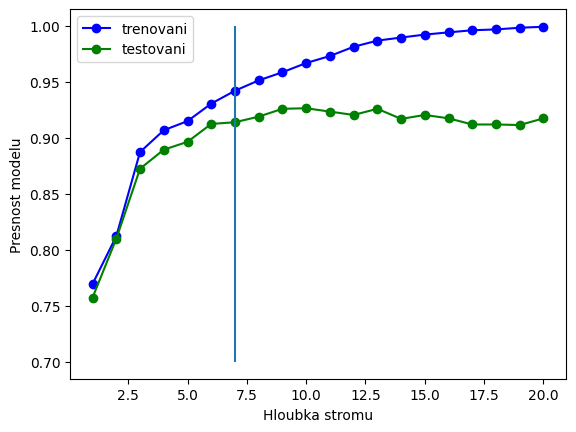

In [43]:
plt.plot(list(range(1, 21, 1)), train_accuracy, 'bo-', label='trenovani')
plt.plot(list(range(1, 21, 1)), test_accuracy, 'go-', label='testovani')
plt.xlabel('Hloubka stromu')
plt.ylabel('Presnost modelu')
plt.vlines(7, 0.7, 1)
plt.legend()